### Repositório do Projeto

O código-fonte completo deste projeto está disponível no GitHub no link abaixo: Caso as imagens do ambiente não apareça, favor acessar no repositório:

[Repositório no GitHub](https://github.com/ronaldobresende/country_data-clustering)

Ronaldo Barbosa Resende

'As imagens abaixo mostram o ambiente de desenvolvimento configurado e o arquivo requirements.txt: '


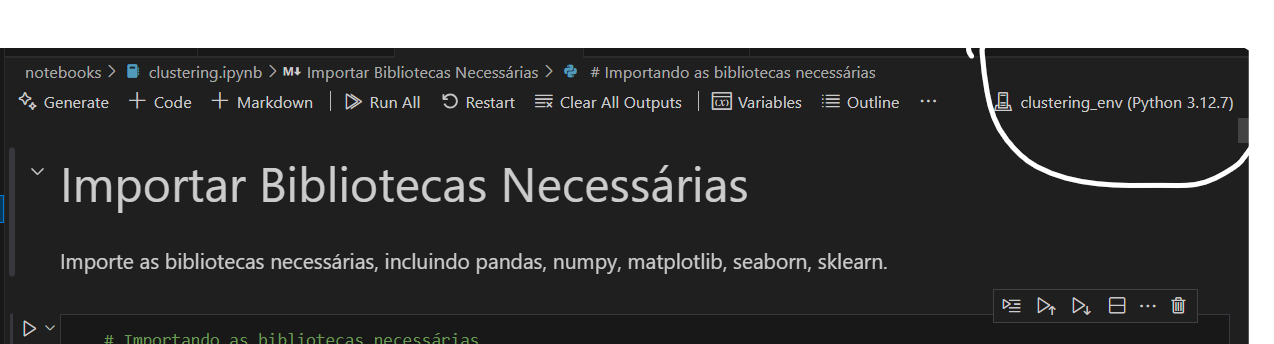


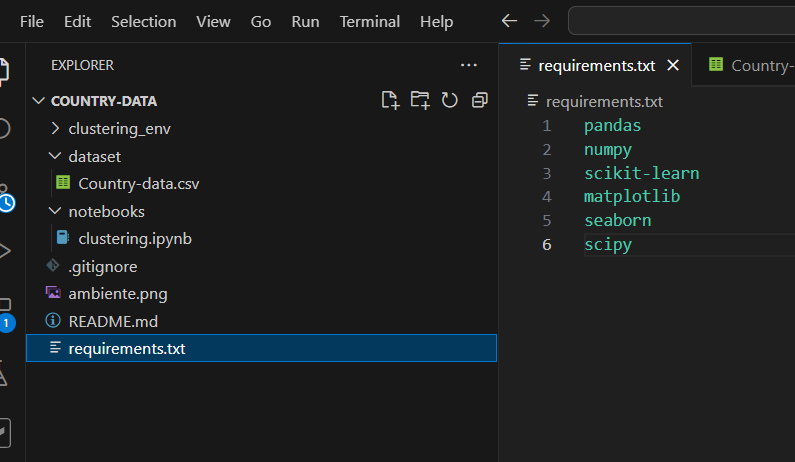

In [15]:
import base64
from IPython.display import HTML

# Caminho para a imagem
image_path = "..\\ambiente.png"

display("As imagens abaixo mostram o ambiente de desenvolvimento configurado e o arquivo requirements.txt: ")

# Converter a imagem para Base64
with open(image_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Exibir a imagem no notebook
display(HTML(f'<img src="data:image/png;base64,{encoded_string}" alt="Descrição da Imagem" width="1274" height="344">'))

# Converter a imagem para Base64
with open("..\\requirements.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Exibir a imagem no notebook
HTML(f'<img src="data:image/png;base64,{encoded_string}" alt="Descrição da Imagem" width="1274" height="344">')



In [16]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN


# Configurando o estilo dos gráficos
sns.set_style("whitegrid")

### Primeiras Linhas do Dataset


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Estatísticas Descritivas do Dataset


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Verificação de Valores Ausentes


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Número de linhas duplicadas: 0
### Distribuição das Variáveis Numéricas


<Figure size 1500x1000 with 0 Axes>

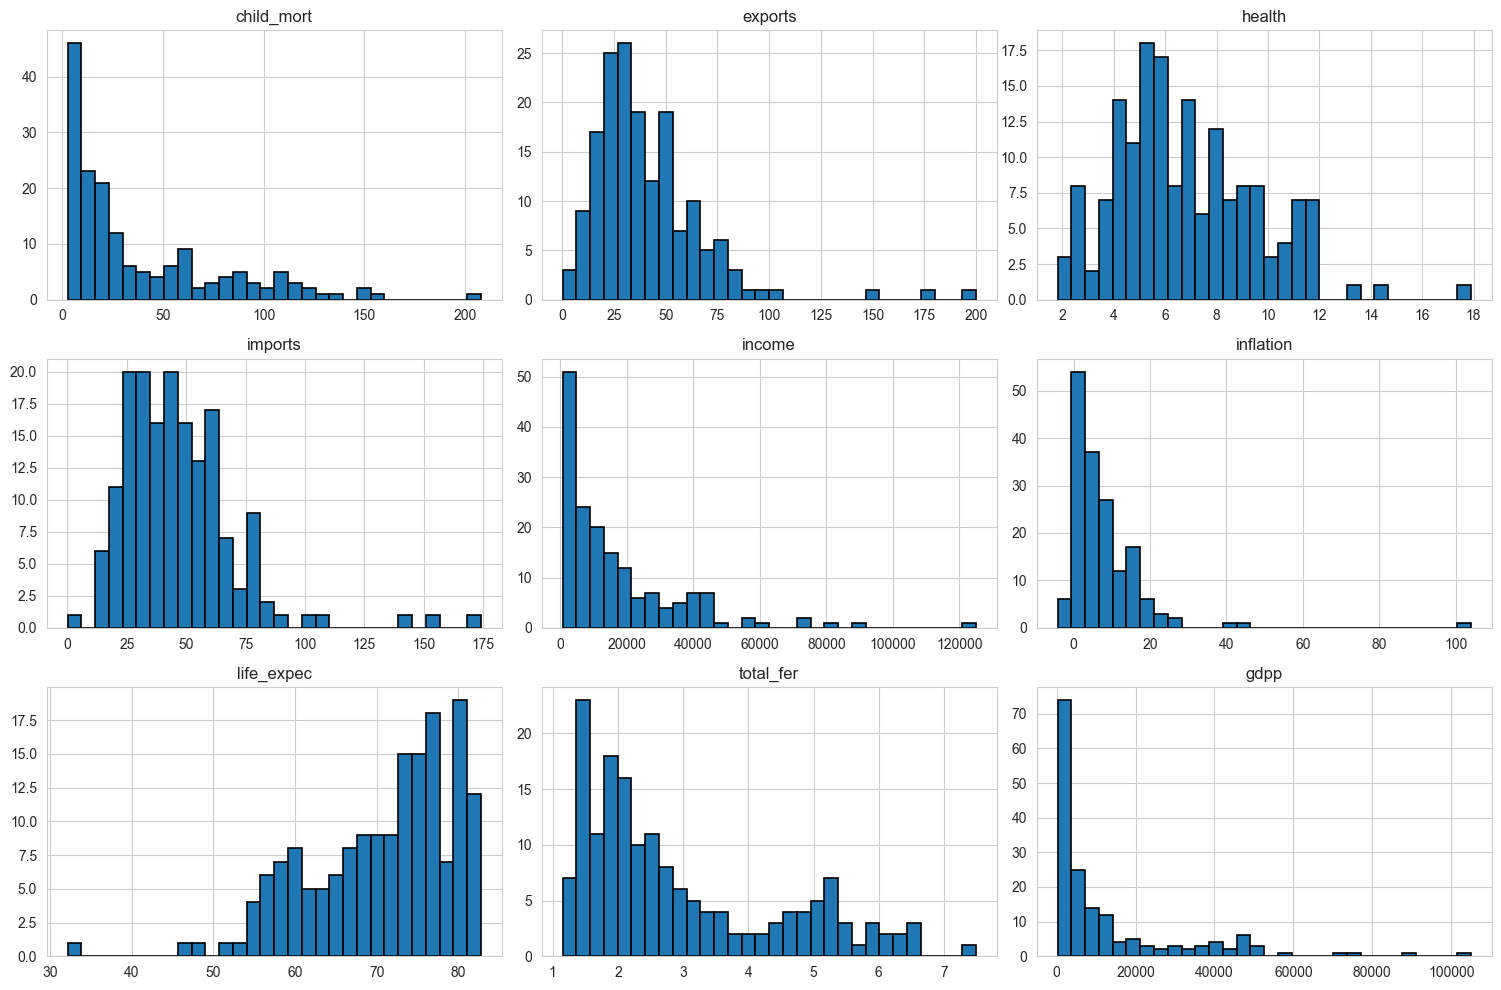

In [17]:
# Análise Exploratória dos Dados

df = pd.read_csv('..\\dataset\\Country-data.csv')

print("### Primeiras Linhas do Dataset")
display(df.head())

print("### Estatísticas Descritivas do Dataset")
display(df.describe())

print("### Verificação de Valores Ausentes")
display(df.isnull().sum())

duplicatas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicatas}")

# Visualizando a distribuição das variáveis numéricas
print("### Distribuição das Variáveis Numéricas")
plt.figure(figsize=(15, 10))
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Análise Exploratória dos Dados

1. **Primeiras Linhas do Dataset**: A tabela acima mostra as primeiras linhas do dataset, permitindo uma visão inicial dos dados.
2. **Estatísticas Descritivas**: As estatísticas descritivas fornecem uma visão geral das distribuições das variáveis numéricas, incluindo média, desvio padrão, valores mínimos e máximos.
3. **Valores Ausentes**: A verificação de valores ausentes mostra que não há valores ausentes no dataset.
4. **Verificação de Duplicatas**: A verificação de duplicatas mostra o número de linhas duplicadas no dataset.
5. **Distribuição das Variáveis**: Os histogramas acima mostram a distribuição das variáveis numéricas no dataset.

In [18]:
# Contagem de Países no Dataset

num_paises = df['country'].nunique()
print(f"Número de Países no Dataset: {num_paises}")

Número de Países no Dataset: 167


### Dados Preparados para Clusterização


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


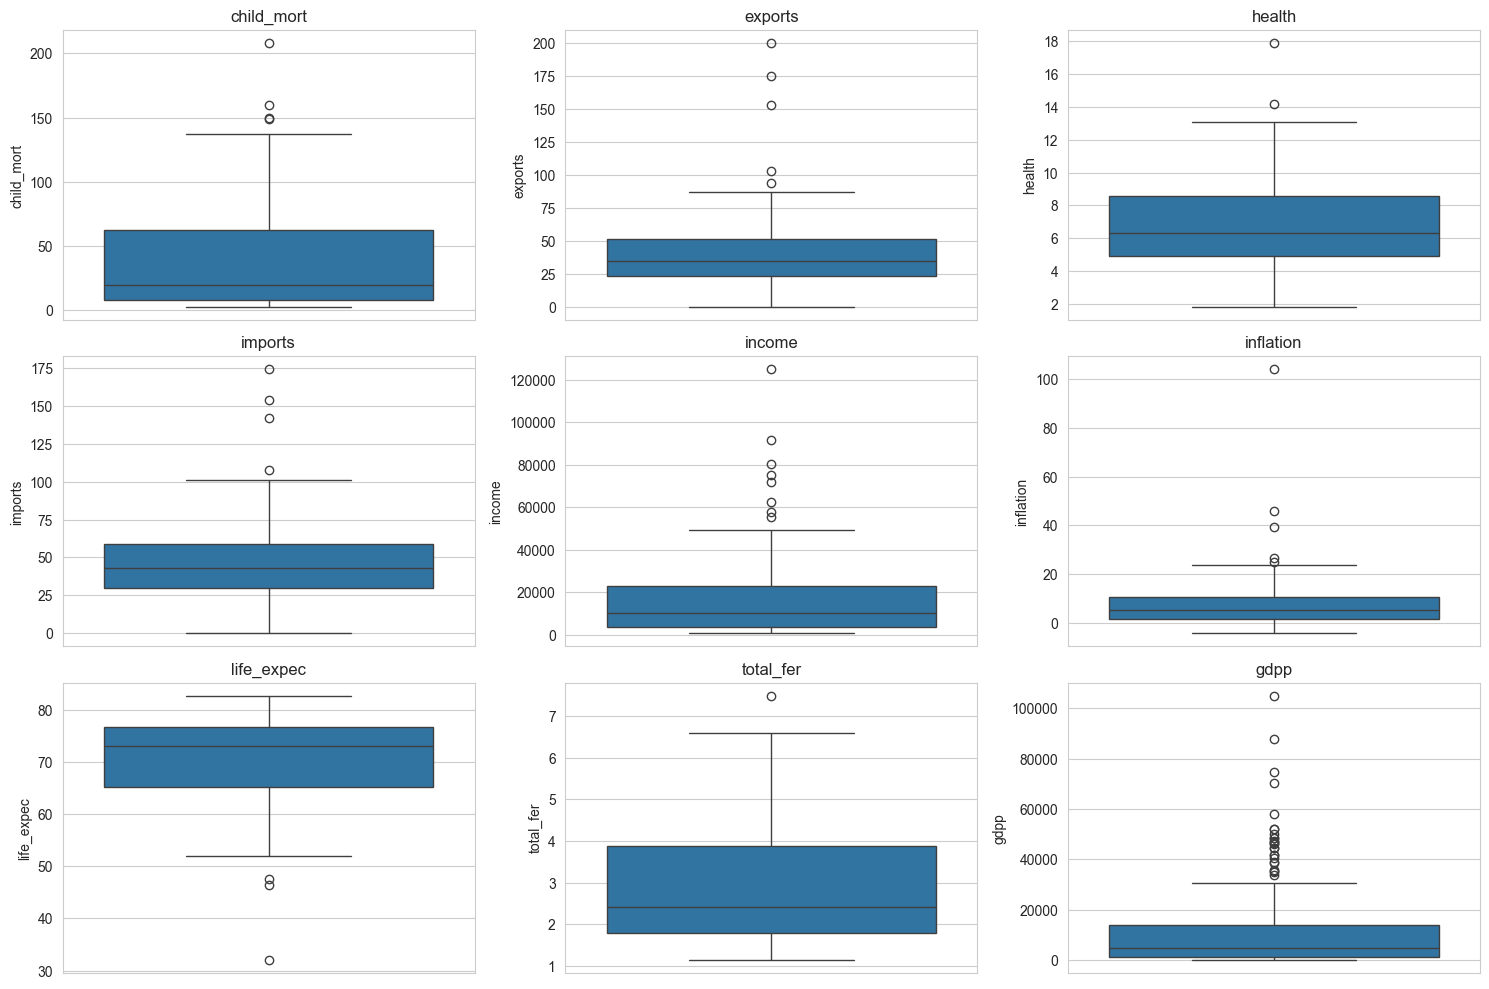

In [19]:
# Preparando os dados para clusterização

variaveis_clusterizacao = df.drop(columns=['country'])
print("### Dados Preparados para Clusterização")
display(variaveis_clusterizacao.head())

# Visualizando a faixa dinâmica das variáveis selecionadas
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(variaveis_clusterizacao, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()


### Faixa Dinâmica das Variáveis

Os gráficos acima mostram a faixa dinâmica das variáveis selecionadas para a clusterização. Cada boxplot representa a distribuição de uma variável, destacando os valores mínimos, máximos, medianos e possíveis outliers.

**Análise dos Resultados**:
1. **child_mort**: A taxa de mortalidade infantil varia significativamente entre os países, com alguns países apresentando valores extremamente altos.
2. **exports**: A porcentagem de exportações em relação ao PIB também varia amplamente, com alguns países altamente dependentes de exportações.
3. **health**: O gasto com saúde como porcentagem do PIB mostra uma distribuição mais concentrada, mas ainda com alguns outliers.
4. **imports**: Semelhante às exportações, a porcentagem de importações em relação ao PIB varia bastante.
5. **income**: A renda per capita apresenta uma grande variação, com alguns países muito mais ricos que outros.
6. **inflation**: A inflação tem uma distribuição ampla, com alguns países enfrentando hiperinflação.
7. **life_expec**: A expectativa de vida varia, mas a maioria dos países está em uma faixa mais alta.
8. **total_fer**: A taxa de fertilidade total varia, com alguns países apresentando taxas muito altas.
9. **gdpp**: O PIB per capita também mostra uma grande variação entre os países.

**Conclusão**: Antes de realizar a clusterização, é importante normalizar os dados para garantir que todas as variáveis contribuam igualmente para a formação dos clusters.


In [20]:
# Pré-processamento dos Dados

# Verificando os tipos de dados das colunas
print("### Tipos de Dados das Colunas")
print(df.dtypes)

# Convertendo colunas 'income' e 'gdpp' para float64
df['income'] = df['income'].astype('float64')
df['gdpp'] = df['gdpp'].astype('float64')

# Verificando os tipos de dados das colunas após a conversão
print("### Tipos de Dados das Colunas Após Conversão")
print(df.dtypes)

# Normalizando os dados
scaler = StandardScaler()
df_scaled = df.copy()
variaveis_clusterizacao = df.drop(columns=['country']).columns
df_scaled[variaveis_clusterizacao] = scaler.fit_transform(df[variaveis_clusterizacao])

# Exibindo as primeiras linhas dos dados normalizados
print("### Dados Normalizados")
display(df_scaled.head())


### Tipos de Dados das Colunas
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
### Tipos de Dados das Colunas Após Conversão
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object
### Dados Normalizados


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Pré-processamento dos Dados

1. **Normalização dos Dados**: Os dados foram normalizados utilizando a técnica de padronização (StandardScaler), que transforma os dados para que tenham média 0 e desvio padrão 1. Isso é importante para garantir que todas as variáveis contribuam igualmente para a formação dos clusters.


In [21]:
# Clusterização com K-Médias

# Realizando a clusterização com K-Médias
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster_kmeans'] = kmeans.fit_predict(df_scaled[variaveis_clusterizacao])

# Exibindo os centros dos clusters
centros_clusters = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=variaveis_clusterizacao)
display(centros_clusters)

# Interpretação dos Clusters
for i in range(3):
    print(f"Cluster {i}:")
    display(df[df_scaled['cluster_kmeans'] == i].describe())

# País Representativo de Cada Cluster
for i in range(3):
    cluster_data = df_scaled[df_scaled['cluster_kmeans'] == i][variaveis_clusterizacao]
    centro_cluster = kmeans.cluster_centers_[i]
    distancias = np.linalg.norm(cluster_data - centro_cluster, axis=1)
    pais_representativo = df.iloc[distancias.argmin()]['country']
    print(f"O país que melhor representa o Cluster {i} é: {pais_representativo}")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


Cluster 0:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
std,14.077521,18.807700,2.166355,19.922847,8084.081117,7.818171,4.304898,0.732649,4966.642378
min,4.500000,0.109000,1.970000,0.065900,1780.000000,-4.210000,57.100000,1.250000,592.000000
25%,11.700000,26.900000,4.872500,32.550000,6702.500000,2.432500,69.900000,1.762500,2970.000000
50%,18.700000,37.650000,5.990000,48.650000,10450.000000,5.935000,73.450000,2.255000,4670.000000
75%,29.175000,51.350000,7.557500,60.275000,16450.000000,10.075000,76.075000,2.670000,9017.500000
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.560000,28000.000000


Cluster 1:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
std,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777
min,2.600000,12.400000,1.810000,13.600000,25200.000000,-3.220000,75.500000,1.150000,16600.000000
25%,3.550000,29.700000,7.735000,28.400000,32450.000000,0.451500,79.500000,1.437500,30675.000000
50%,4.200000,50.350000,9.445000,39.050000,40550.000000,1.190000,80.350000,1.815000,41200.000000
75%,5.750000,67.925000,10.775000,62.900000,46625.000000,3.647500,81.400000,1.957500,48475.000000
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000


Cluster 2:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111
std,32.422133,18.367324,2.687881,18.038146,5420.118667,15.836572,6.467631,1.011400,2917.949542
min,53.700000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000
25%,66.800000,16.800000,4.510000,29.600000,1390.000000,3.870000,56.500000,4.600000,547.000000
50%,90.300000,23.800000,5.300000,40.300000,1850.000000,8.790000,59.500000,5.110000,769.000000
75%,111.000000,36.800000,7.650000,49.300000,3320.000000,16.600000,62.800000,5.710000,1310.000000
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000


O país que melhor representa o Cluster 0 é: Ireland
O país que melhor representa o Cluster 1 é: Barbados
O país que melhor representa o Cluster 2 é: Benin


### Clusterização com K-Médias

1. **Centros dos Clusters**: A tabela acima mostra os centros dos clusters obtidos pelo algoritmo K-Médias. Cada linha representa um cluster e cada coluna representa a média das variáveis dentro daquele cluster.

### Interpretação dos Clusters

1. **Cluster 0**: A descrição estatística dos países pertencentes ao Cluster 0.
2. **Cluster 1**: A descrição estatística dos países pertencentes ao Cluster 1.
3. **Cluster 2**: A descrição estatística dos países pertencentes ao Cluster 2.

**Análise**:
- **Distribuição das Dimensões**: A distribuição das dimensões em cada grupo pode ser observada nas tabelas acima.
- **País Representativo**: O país que melhor representa cada cluster pode ser determinado pela proximidade aos centros dos clusters.

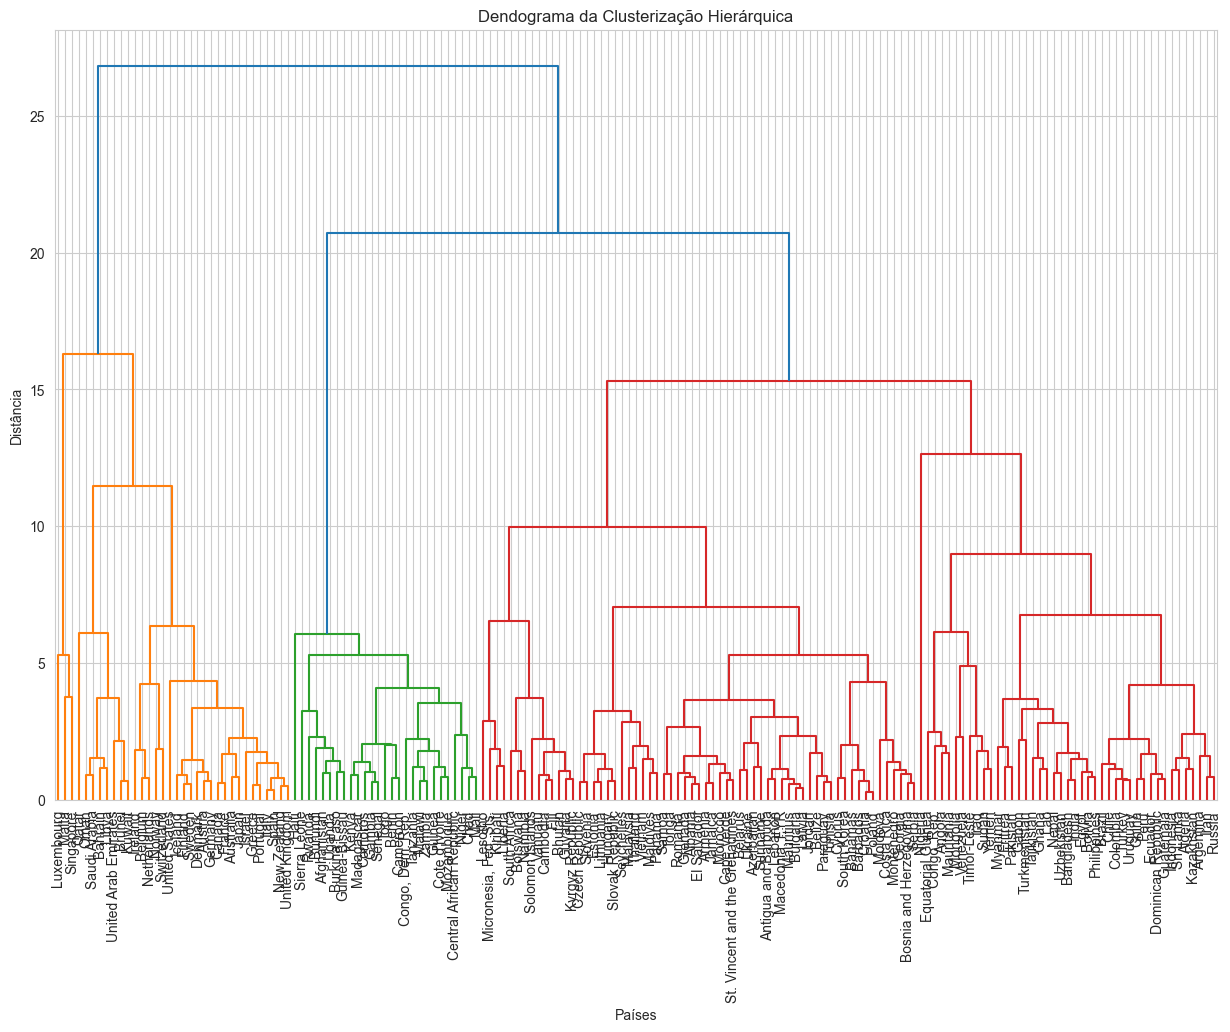

,country,cluster_hierarchical
0,Afghanistan,2
1,Albania,1
2,Algeria,1
3,Angola,1
4,Antigua and Barbuda,1
...,...,...
162,Vanuatu,1
163,Venezuela,1
164,Vietnam,1
165,Yemen,1


In [22]:
# Clusterização Hierárquica

# Realizando a clusterização hierárquica
Z = linkage(df_scaled[variaveis_clusterizacao], method='ward')

# Plotando o dendograma
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df_scaled['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()

# Realizando a clusterização hierárquica com 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df_scaled['cluster_hierarchical'] = hc.fit_predict(df_scaled[variaveis_clusterizacao])

# Exibindo os clusters hierárquicos
df_scaled[['country', 'cluster_hierarchical']]



### Clusterização Hierárquica

1. **Dendograma**: O dendograma acima mostra a hierarquia de aglomeração dos países. Cada linha representa a fusão de dois clusters, e a altura da linha representa a distância entre os clusters.
2. **Clusters Hierárquicos**: A tabela acima mostra a atribuição de cada país a um dos três clusters obtidos pela clusterização hierárquica.


# Dendograma da Clusterização Hierárquica
Apresente o dendograma da clusterização hierárquica e interprete os resultados.

# Comparação dos Resultados de Clusterização
Compare os resultados dos dois métodos de clusterização, apontando semelhanças e diferenças.

In [23]:
# Comparando os clusters obtidos pelo K-Médias e pela Clusterização Hierárquica
comparacao_clusters = df_scaled[['country', 'cluster_kmeans', 'cluster_hierarchical']]

# Exibindo a comparação dos clusters
comparacao_clusters.head()



,country,cluster_kmeans,cluster_hierarchical
0,Afghanistan,2,2
1,Albania,0,1
2,Algeria,0,1
3,Angola,2,1
4,Antigua and Barbuda,0,1


### Comparação dos Resultados de Clusterização

A tabela acima mostra a comparação entre os clusters obtidos pelo K-Médias e pela Clusterização Hierárquica para cada país.

**Semelhanças e Diferenças**:
1. **Semelhanças**: Ambos os métodos de clusterização identificam grupos de países com características semelhantes, mas podem diferir na atribuição de alguns países a clusters específicos.
2. **Diferenças**: O K-Médias tende a formar clusters de tamanhos mais uniformes, enquanto a Clusterização Hierárquica pode resultar em clusters de tamanhos variados. Além disso, a Clusterização Hierárquica permite visualizar a hierarquia de aglomeração através do dendograma, o que pode fornecer insights adicionais sobre a estrutura dos dados.

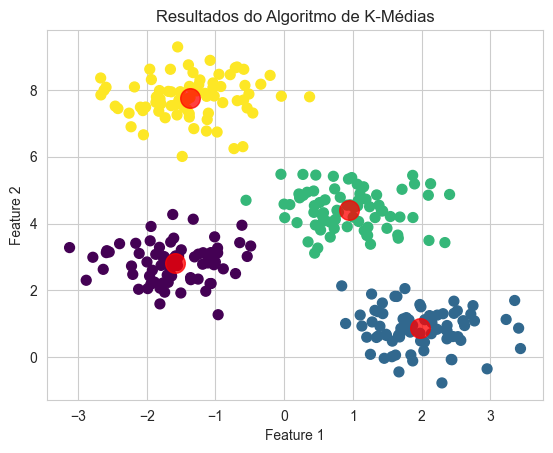

In [24]:
# Etapas do Algoritmo de K-Médias

# Implementação de Exemplo do Algoritmo de K-Médias

# Gerando dados de exemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Inicialização: Selecionar aleatoriamente K pontos como centróides iniciais
def inicializar_centroides(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Atribuição: Atribuir cada ponto de dados ao centróide mais próximo
def atribuir_clusters(X, centroides):
    distancias = np.linalg.norm(X[:, np.newaxis] - centroides, axis=2)
    return np.argmin(distancias, axis=1)

# Atualização: Calcular a média de cada cluster e atualizar os centróides
def atualizar_centroides(X, clusters, k):
    return np.array([X[clusters == i].mean(axis=0) for i in range(k)])

# Algoritmo de K-Médias
def kmeans(X, k, max_iter=100):
    centroides = inicializar_centroides(X, k)
    for _ in range(max_iter):
        clusters = atribuir_clusters(X, centroides)
        novos_centroides = atualizar_centroides(X, clusters, k)
        if np.all(centroides == novos_centroides):
            break
        centroides = novos_centroides
    return clusters, centroides

# Aplicando o algoritmo de K-Médias aos dados de exemplo
k = 4
clusters, centroides = kmeans(X, k)

# Visualizando os resultados
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.75)
plt.title('Resultados do Algoritmo de K-Médias')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




### Implementação de Exemplo do Algoritmo de K-Médias

1. **Inicialização**: Os centróides iniciais são selecionados aleatoriamente a partir dos pontos de dados.
2. **Atribuição**: Cada ponto de dados é atribuído ao centróide mais próximo, formando clusters.
3. **Atualização**: Os centróides são atualizados para a média dos pontos em cada cluster.
4. **Convergência**: O processo é repetido até que os centróides não mudem significativamente ou o número máximo de iterações seja alcançado.


In [25]:
# Algoritmo de K-Médias com Medóides

# Função para inicializar os medóides
def inicializar_medoides(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Função para atribuir clusters com base nos medóides
def atribuir_clusters_medoides(X, medoides):
    distancias = np.linalg.norm(X[:, np.newaxis] - medoides, axis=2)
    return np.argmin(distancias, axis=1)

# Função para atualizar os medóides
def atualizar_medoides(X, clusters, k):
    novos_medoides = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_i = X[clusters == i]
        distancias = np.linalg.norm(cluster_i[:, np.newaxis] - cluster_i, axis=2)
        distancias_totais = distancias.sum(axis=1)
        novos_medoides[i] = cluster_i[np.argmin(distancias_totais)]
    return novos_medoides

# Algoritmo de K-Médias com Medóides
def kmedoids(X, k, max_iter=100):
    medoides = inicializar_medoides(X, k)
    for _ in range(max_iter):
        clusters = atribuir_clusters_medoides(X, medoides)
        novos_medoides = atualizar_medoides(X, clusters, k)
        if np.all(medoides == novos_medoides):
            break
        medoides = novos_medoides
    return clusters, medoides

# Aplicando o algoritmo de K-Médias com Medóides aos dados normalizados
k = 3
clusters_medoides, medoides = kmedoids(df_scaled[variaveis_clusterizacao].values, k)

# Adicionando os clusters ao dataframe
df_scaled['cluster_kmedoids'] = clusters_medoides

# Exibindo os medóides
medoides_df = pd.DataFrame(scaler.inverse_transform(medoides), columns=variaveis_clusterizacao)
display(medoides_df)

# País Representativo de Cada Cluster com Medóides
for i in range(3):
    cluster_data = df_scaled[df_scaled['cluster_kmedoids'] == i][variaveis_clusterizacao]
    medoid = medoides[i]
    distancias = np.linalg.norm(cluster_data - medoid, axis=1)
    pais_representativo = df_scaled.iloc[distancias.argmin()]['country']
    print(f"O país que melhor representa o Cluster {i} é: {pais_representativo}")


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,62.7,13.3,11.30,79.9,1730.0,1.52,60.7,3.84,1490.0
1,74.7,29.5,5.22,45.9,3060.0,16.60,62.2,4.27,1310.0
2,6.0,40.1,7.46,42.1,21800.0,1.66,76.3,1.41,12600.0


O país que melhor representa o Cluster 0 é: Albania
O país que melhor representa o Cluster 1 é: Bosnia and Herzegovina
O país que melhor representa o Cluster 2 é: Indonesia



### Algoritmo de K-Médias com Medóides

1. **Medóides**: A tabela acima mostra os medóides obtidos pelo algoritmo de K-Médias com Medóides. Cada linha representa um medóide e cada coluna representa as variáveis do dataset.

### País Representativo de Cada Cluster com Medóides

1. **Cluster 0**: O país que melhor representa o Cluster 0 é mostrado acima.
2. **Cluster 1**: O país que melhor representa o Cluster 1 é mostrado acima.
3. **Cluster 2**: O país que melhor representa o Cluster 2 é mostrado acima.

**Justificativa**: O país representativo é aquele cuja distância ao medóide do cluster é a menor, indicando que ele é o mais próximo do baricentro do cluster.


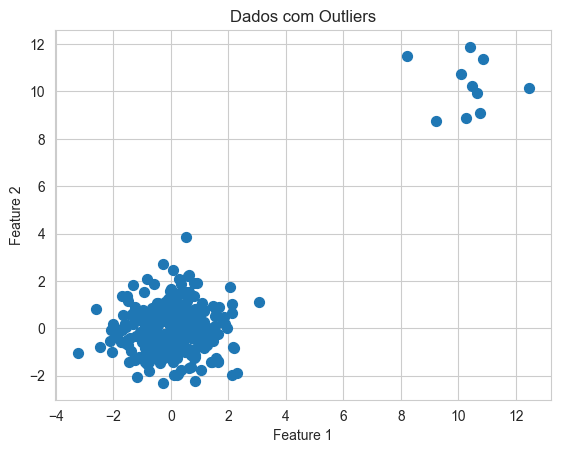

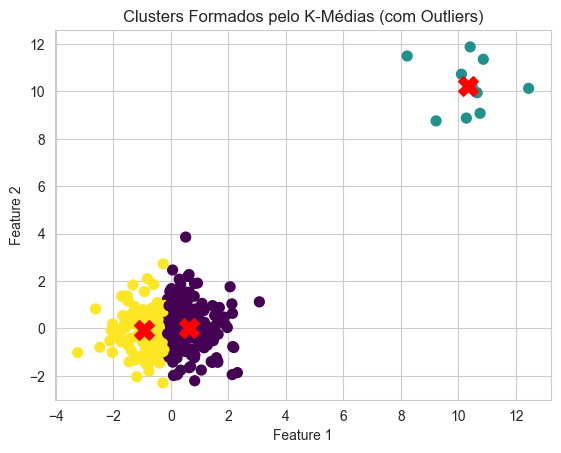

In [26]:
# Sensibilidade do Algoritmo de K-Médias a Outliers

# Gerar dados de exemplo
np.random.seed(42)
# Dados normais
X = np.random.normal(loc=0, scale=1, size=(300, 2))
# Adicionar outliers
df_with_outliers = np.random.normal(loc=10, scale=1, size=(10, 2))
X = np.vstack([X, df_with_outliers])

# Visualizar os dados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dados com Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Aplicar K-Médias sem remover outliers
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar os clusters formados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Clusters Formados pelo K-Médias (com Outliers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Sensibilidade do Algoritmo de K-Médias a Outliers

O algoritmo de K-Médias é sensível a outliers porque utiliza a média para calcular os centróides dos clusters. Outliers podem distorcer a média, fazendo com que os centróides se desloquem em direção aos outliers, o que pode resultar em clusters menos representativos dos dados reais.

Como podemos ver no exemplo prático acima, os outliers influenciam significativamente a formação dos clusters e a posição dos centróides. Isso demonstra a sensibilidade do algoritmo de K-Médias a outliers.

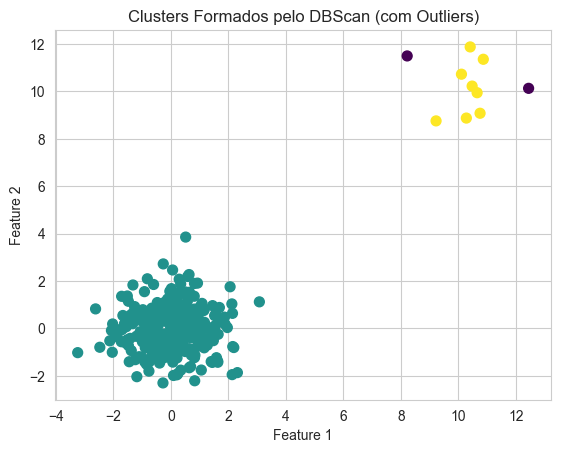

In [27]:
# Robustez do DBScan a Outliers

# Aplicar DBScan aos dados com outliers
dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualizar os clusters formados pelo DBScan
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('Clusters Formados pelo DBScan (com Outliers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Robustez do DBScan a Outliers

O algoritmo DBScan (Density-Based Spatial Clustering of Applications with Noise) é mais robusto à presença de outliers em comparação com o K-Médias. Isso ocorre porque o DBScan não depende de centróides ou médias para formar clusters. Em vez disso, ele identifica regiões densas de pontos e as expande para formar clusters, enquanto pontos que não pertencem a nenhuma região densa são considerados outliers.
Para ilustrar essa robustez foi usado um exemplo aplicando o DBScan aos dados com outliers.

### Visualização dos Clusters Formados pelo DBScan

Como podemos ver, o DBScan identifica os outliers (pontos rotulados como -1) e forma clusters densos sem ser influenciado por eles.
